In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
import scipy.optimize as opt
from matplotlib import cm
%matplotlib inline
%run "Functions.ipynb"

## Exercise One - 30pts

In [48]:
# a) - divide by zero encountered in log
def obj_function(xy):
    x,y, = xy
    log_x = np.where(x > 0, np.log(x), 40) # ensuring continuity
    return (y + log_x)**2 + (y-x)**2 

# b)
def grad_f(xy):
    x,y, = xy
    log_x = np.where(x > 0, np.log(x), 40)
    return np.array([2*(y+log_x)*1/x - 2*(y-x), 2*(y+log_x) + 2*(y-x)])

def hess_f(xy):
    x,y, = xy
    log_x = np.where(x > 0, np.log(x), 40)
    return np.array([[-2*y/x**2 + 2 + 2/x**2 - 2*log_x/x**2, 2/x -2], [2/x -2, 4]])

Functions= Functions(obj_function,grad_f,hess_f)

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_72101/367347569.py:4: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x > 0, np.log(x), 40) # ensuring continuity


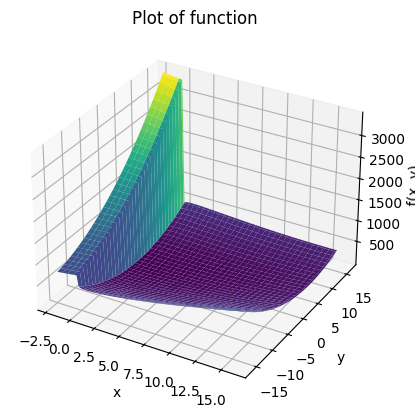

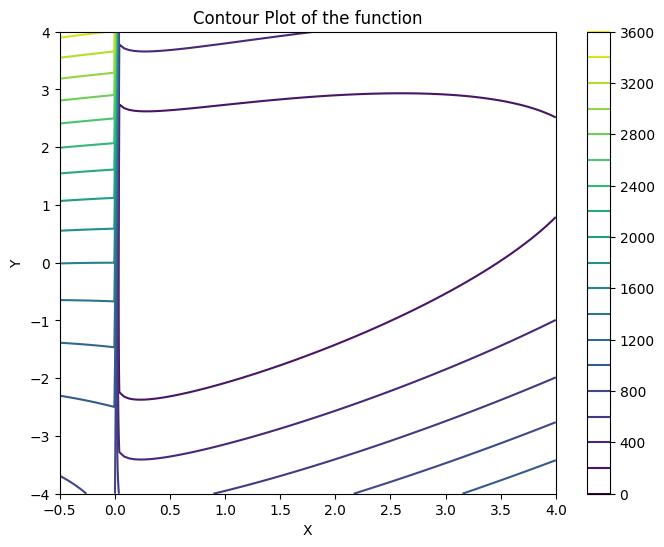

In [54]:
n = 100
h = 2 / n
x = np.linspace(-0.5, 4, n + 1)
y = np.linspace(-4, 4, n + 1)
X, Y = np.meshgrid(x, y)

# Compute the function values on the grid
alpha = 4
Z = obj_function(np.array([alpha * X, alpha * Y]))

# Plot the function of two variables
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha * X, alpha * Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y) ')
plt.title('Plot of function')
plt.show()

plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of the function')
plt.colorbar(contour)

plt.show()

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_72101/367347569.py:4: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x > 0, np.log(x), 40) # ensuring continuity


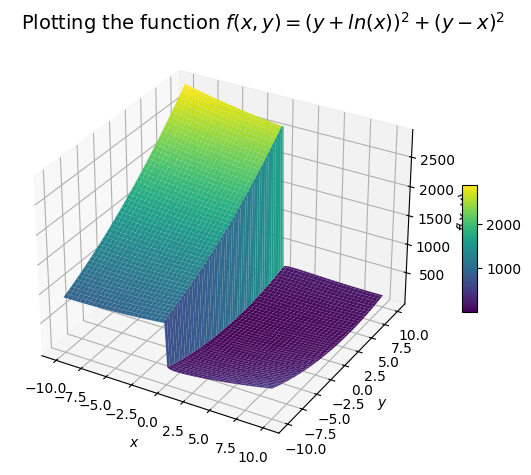

In [32]:
# c) # plot the function and its contours
from matplotlib import cm

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

Z = obj_function([X, Y])


fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': '3d'})
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title(r'Plotting the function $f(x, y) = (y+ln(x))^2 + (y-x)^2$', fontsize=14).set_position([.6, 1.05])
fig.colorbar(surf, shrink=0.3, aspect=9)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$f(x, y)$')
plt.tight_layout()

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_72101/367347569.py:4: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x > 0, np.log(x), 40) # ensuring continuity


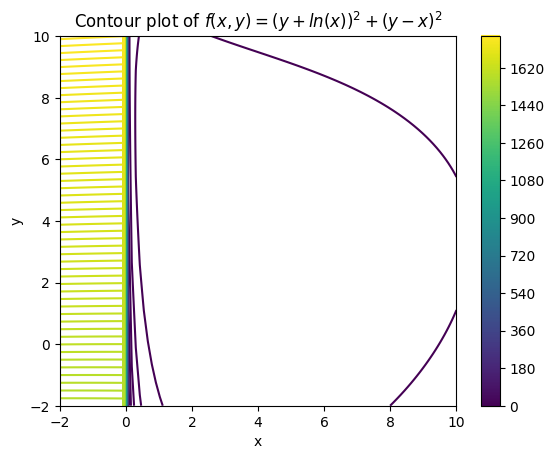

In [33]:
x = np.linspace(-2, 10, 100)
y = np.linspace(-2, 10, 100)
X, Y = np.meshgrid(x, y)

Z = obj_function([0.2*X, 0.2*Y])
plt.contour(X, Y, Z, 500, cmap='viridis')
plt.title(r'Contour plot of $f(x, y) = (y+ln(x))^2 + (y-x)^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

### Newton-Raphson Method
optimal points: [0.56623584, 0.56684599, 3.977058003457307e-06]

In [41]:
# d)

def newton_raphson(x, tolerance=1e-6, max_iterations=100):
    iteration = 0
    while iteration < max_iterations:
        fx = x + np.log(x)
        grad_x = 1 + 1 / x
        if np.abs(fx) < tolerance:
            break
        # Update using Newton-Raphson method
        x -= fx / grad_x
        iteration += 1
    return x, iteration

x, iteration = newton_raphson(2)
y = - np.log(x)
print(iteration, x, y)

5 0.5671432878675967 0.5671432948922264


In [42]:
grad_f([0.5671432878675967, 0.5671432948922264]) #which is approximately 0

array([-1.40492593e-08,  1.40492593e-08])

In [43]:
# numerical soln with scipy.optimise

evals, evecs = np.linalg.eig(hess_f([0.5671432878675967, 0.5671432948922264]))
evals #which is positive definite

array([8.71236155, 3.50554803])

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_52229/2918918060.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(y,-np.log(x), ls='--', label=r'$y = -ln(x)$')


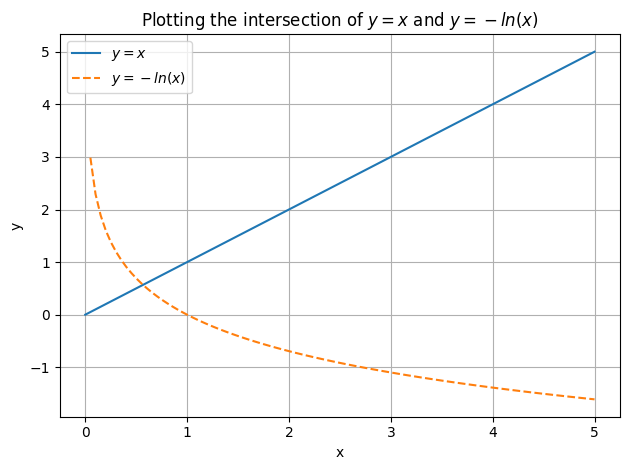

In [44]:
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)

plt.figure()
plt.plot(y,x, label=r'$y = x$')
plt.plot(y,-np.log(x), ls='--', label=r'$y = -ln(x)$')
plt.title(r'Plotting the intersection of $y = x$ and $y = -ln(x)$')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.tight_layout()

## Exercise 2 - 18pts

In [41]:
%run "Functions.ipynb"
def obj_function(xy):
    x,y, = xy
    x = np.where(x <= 0, 0, x)
    return (y + np.log(x))**2 + (y-x)**2 #X>0!!!

def grad_f(xy):
    x,y, = xy
    x = np.where(x <= 0, 0, x)
    return np.array([2*(y+np.log(x))*1/x - 2*(y-x), 2*(y+np.log(x)) + 2*(y-x)])

def hess_f(xy):
    x,y, = xy
    x = np.where(x <= 0, 0, x)
    return np.array([[-2*y/x**2 + 2 + 2/x**2 - 2*np.log(x)/x**2, 2/x -2], [2/x -2, 4]])

Functions= Functions(obj_function,grad_f,hess_f)

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_72101/4198343015.py:5: RuntimeWarning: divide by zero encountered in log
  return (y + np.log(x))**2 + (y-x)**2 #X>0!!!
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_72101/4198343015.py:10: RuntimeWarning: divide by zero encountered in log
  return np.array([2*(y+np.log(x))*1/x - 2*(y-x), 2*(y+np.log(x)) + 2*(y-x)])
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_72101/1006736923.py:90: RuntimeWarning: invalid value encountered in matmul
  return self.df(x_k + alpha * p_k).T @ p_k
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_72101/367347569.py:4: RuntimeWarning: divide by zero encountered in log
  log_x = np.where(x > 0, np.log(x), 40) # ensuring continuity


Number of iterations: 13
Xmin: [0.56714323 0.56714322]
fMin(z): 3.179885450478677e-14)


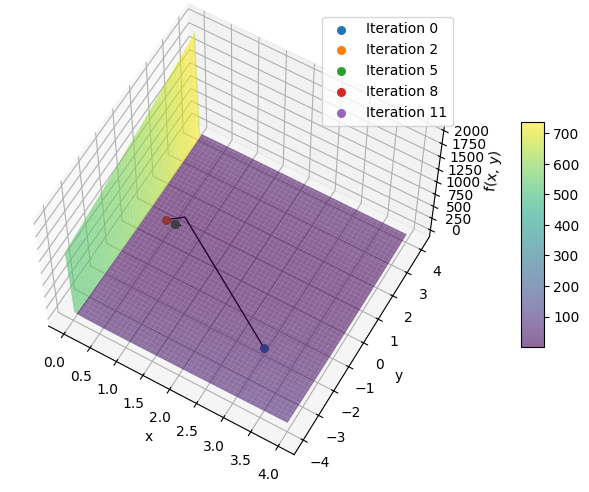

In [34]:
# a)
xMin, fMin, nIter, info = Functions.descentLineSearch(x0=[3,-2], alpha0 = 0, alpha_max = 1, tol = 1e-6, maxIter = 500, ls ='linesearch', 
                                                      switch ='steepest', stop_type = 'grad', fixed_step = False, fixed_alpha = 0.1)
print(f'Number of iterations: {nIter}\nXmin: {xMin}\nfMin(z): {fMin})')

cos = []
for co in info['xs']:
    cos.append([co[0], co[1]])
cos = np.array(cos)

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(0, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Evaluate fxy at each point on the grid
Z = obj_function([X, Y])

# Create a 3D plot
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': '3d'})
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
plt.colorbar(surf, shrink=0.5, aspect=10, pad=0.1)
for i in range(len(cos)):
    if i == 0 or i == int(1*len(cos)/5) or i == int(2*len(cos)/5) or i == int(3*len(cos)/5) or i == int(4*len(cos)/5) or i == len(cos):
        ax.scatter(cos[i,0], cos[i,1], obj_function([cos[i,0], cos[i,1]]), s=30, label=f'Iteration {i}')
ax.plot(cos[:,0],cos[:,1], obj_function([cos[:,0], cos[:,1]]), color='black', linewidth=1)
# ax.set_title('Plotting the Steepest Descent line Search Method for [3,-2]', fontsize=14)
ax.set_xlabel('x')
ax.set_ylabel('y') 
ax.set_zlabel('f(x, y)')
ax.view_init(elev=60, azim=300)
ax.legend()
plt.tight_layout()

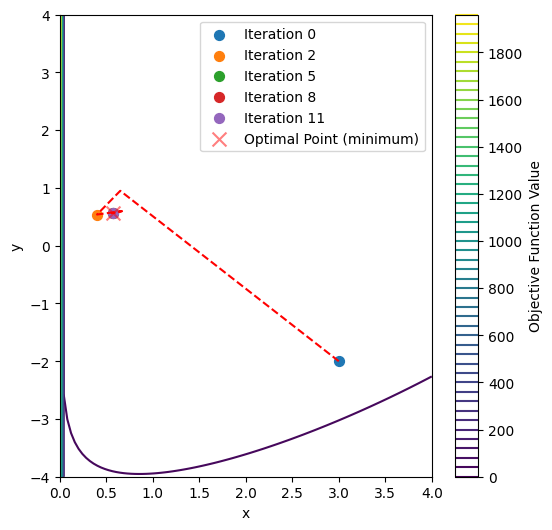

In [35]:
plt.figure(figsize=(6,6))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis') #contourf
plt.colorbar(contour, label='Objective Function Value')
for i in range(len(cos)):
    if i == 0 or i == int(1*len(cos)/5) or i == int(2*len(cos)/5) or i == int(3*len(cos)/5) or i == int(4*len(cos)/5) or i == len(cos):
        plt.scatter(cos[i,0], cos[i,1], s=50, label=f'Iteration {i}')
plt.plot(cos[:,0],cos[:,1], color='red', linestyle='dashed')
plt.scatter(0.567,0.567, color='red', marker='x', label='Optimal Point (minimum)', alpha=0.5, s=100)
# plt.title('Plotting the Descent for [3, -2] against contour plot') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

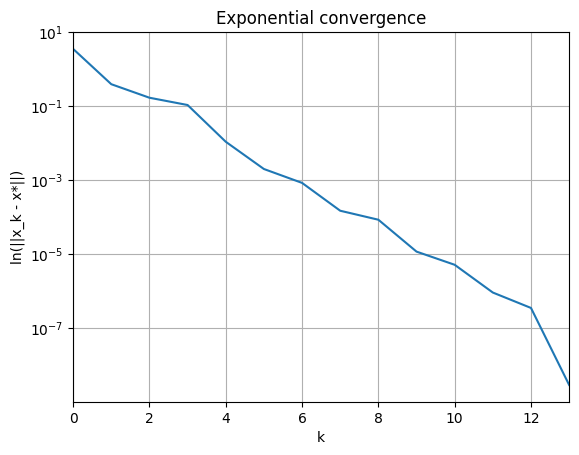

In [36]:
# B)
Functions.convergence_history(info, xMin, x0=[3,-2], p=2, H=None, plot_type='Exp_convergence')

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_72101/4198343015.py:5: RuntimeWarning: divide by zero encountered in log
  return (y + np.log(x))**2 + (y-x)**2 #X>0!!!
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_72101/4198343015.py:10: RuntimeWarning: divide by zero encountered in log
  return np.array([2*(y+np.log(x))*1/x - 2*(y-x), 2*(y+np.log(x)) + 2*(y-x)])
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_72101/367347569.py:4: RuntimeWarning: divide by zero encountered in log
  log_x = np.where(x > 0, np.log(x), 40) # ensuring continuity


Number of iterations: 18
Xmin: [0.56714334 0.56714322]
fMin(z): 1.4476820658815175e-14)


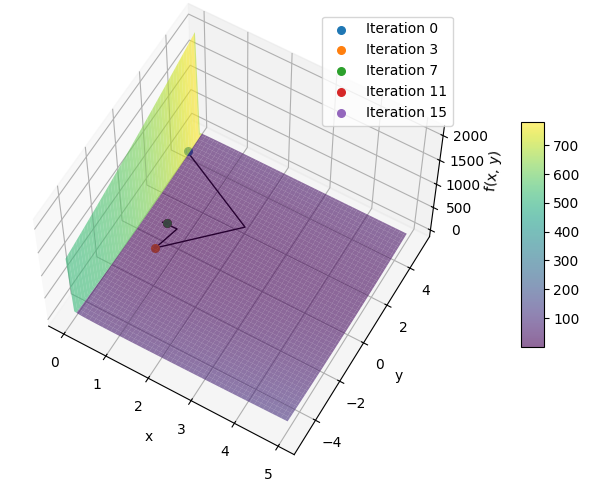

In [37]:
xMin, fMin, nIter, info = Functions.descentLineSearch(x0=[0.05, 4], alpha0 = 0, alpha_max = 1, tol = 1e-6, maxIter = 500, ls ='lineSearch', 
                                                      switch ='steepest', stop_type = 'grad', fixed_step = False, fixed_alpha = 0.1)
print(f'Number of iterations: {nIter}\nXmin: {xMin}\nfMin(z): {fMin})')

cos = []
for co in info['xs']:
    cos.append([co[0], co[1]])
cos = np.array(cos)

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(0, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Evaluate fxy at each point on the grid
Z = obj_function([X, Y])

# Create a 3D plot
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': '3d'})
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
plt.colorbar(surf, shrink=0.5, aspect=10, pad=0.1)
for i in range(len(cos)):
    if i == 0 or i == int(1*len(cos)/5) or i == int(2*len(cos)/5) or i == int(3*len(cos)/5) or i == int(4*len(cos)/5) or i == len(cos):
        ax.scatter(cos[i,0], cos[i,1], obj_function([cos[i,0], cos[i,1]]), s=30, label=f'Iteration {i}')
ax.plot(cos[:,0],cos[:,1], obj_function([cos[:,0], cos[:,1]]), color='black', linewidth=1)
# ax.set_title('Plotting the Steepest Descent line Search Method for [0.05,4]', fontsize=14)
ax.set_xlabel('x')
ax.set_ylabel('y') 
ax.set_zlabel('f(x, y)')
ax.view_init(elev=60, azim=300)
ax.legend()
plt.tight_layout()

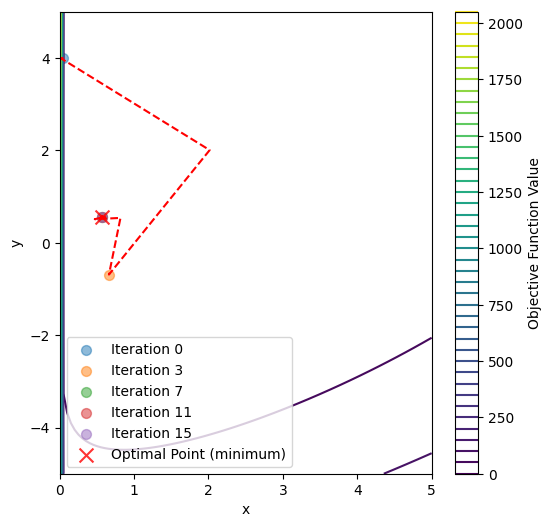

In [38]:
plt.figure(figsize=(6,6))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis') 
plt.colorbar(contour, label='Objective Function Value')
for i in range(len(cos)):
    if i == 0 or i == int(1*len(cos)/5) or i == int(2*len(cos)/5) or i == int(3*len(cos)/5) or i == int(4*len(cos)/5) or i == len(cos):
        plt.scatter(cos[i,0], cos[i,1], s=50, label=f'Iteration {i}', alpha=0.5)
plt.plot(cos[:,0],cos[:,1], color='red', linestyle='dashed')
plt.scatter(0.567,0.567, color='red', marker='x', label='Optimal Point (minimum)', alpha=0.8, s=100)
# plt.title('Plotting the Descent for [0.05, 4] against contour plot') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

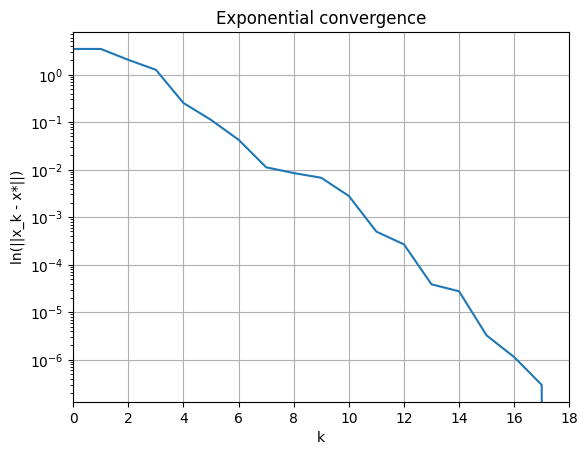

In [39]:
Functions.convergence_history(info, xMin, x0=[0.05, 4], p=2, H=None, plot_type='Exp_convergence')

In [40]:
%run "Functions.ipynb"
# a) - divide by zero encountered in log
def obj_function(xy):
    x,y, = xy
    x = np.where(x <= 0, 0, x)
    return (y + np.log(x))**2 + (y-x)**2 #X>0!!!

# b)
def grad_f(xy):
    x,y, = xy
    x = np.where(x <= 0, 0, x)
    return np.array([2*(y+np.log(x))*1/x - 2*(y-x), 2*(y+np.log(x)) + 2*(y-x)])

def hess_f(xy):
    x,y, = xy
    x = np.where(x <= 0, 0, x)
    return np.array([[-2*y/x**2 + 2 + 2/x**2 - 2*np.log(x)/x**2, 2/x -2], [2/x -2, 4]])

Functions= Functions(obj_function,grad_f,hess_f)

Line search stopped because the interval became too small. Returning center of the interval.
Centre: 0.0
Number of iterations: 4
Xmin: [0.56714329 0.56714329]
fMin(z): 6.562474138889063e-18)


/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_72101/4198343015.py:5: RuntimeWarning: divide by zero encountered in log
  return (y + np.log(x))**2 + (y-x)**2 #X>0!!!


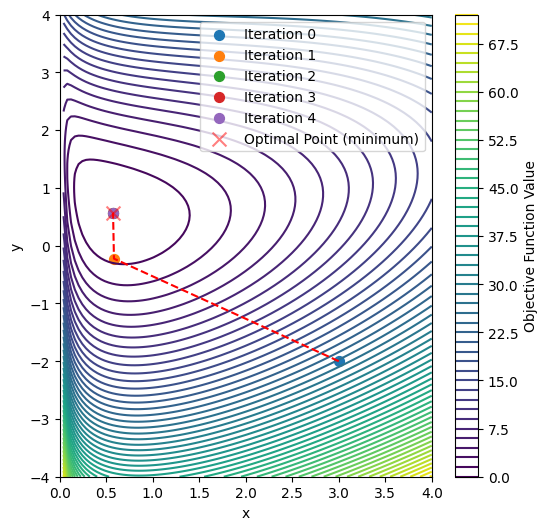

In [42]:
# c)
new_xMin, new_fMin, new_nIter, new_info = Functions.descentLineSearch(x0 = [3,-2], alpha0 = 0, alpha_max = 1, tol = 1e-6, maxIter = 500, ls ='linesearch', 
                                                      switch ='newton', stop_type = 'grad', fixed_step = False, fixed_alpha = 0.1)
# def backtrack_LineSearch(self, x0, alpha0=1, tol=0.1, maxIter=1000, switch='steepest', 
#                          stop_type = 'grad', c1=1, c2=0.1, p=0.2)
    
print(f'Number of iterations: {new_nIter}\nXmin: {new_xMin}\nfMin(z): {new_fMin})')

cos = []
for co in new_info['xs']:
    cos.append([co[0], co[1]])
cos = np.array(cos)

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(0, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Evaluate fxy at each point on the grid
Z = obj_function([X, Y])

plt.figure(figsize=(6,6))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis') 
plt.colorbar(contour, label='Objective Function Value')
for i in range(len(cos)):
    if i == 0 or i == int(1*len(cos)/5) or i == int(2*len(cos)/5) or i == int(3*len(cos)/5) or i == int(4*len(cos)/5) or i == len(cos):
        plt.scatter(cos[i,0], cos[i,1], s=50, label=f'Iteration {i}')
plt.plot(cos[:,0],cos[:,1], color='red', linestyle='dashed')
plt.scatter(0.567,0.567, color='red', marker='x', label='Optimal Point (minimum)', alpha=0.5, s=100)
# plt.title('Plotting the Descent for [3, -2] against contour plot') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

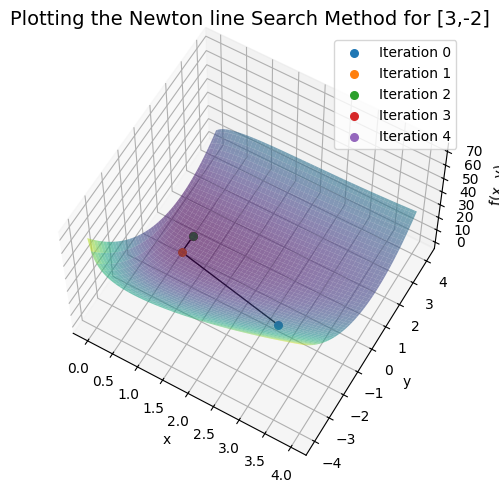

In [185]:
# Create a 3D plot
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
for i in range(len(cos)):
    if i == 0 or i == int(1*len(cos)/5) or i == int(2*len(cos)/5) or i == int(3*len(cos)/5) or i == int(4*len(cos)/5) or i == len(cos):
        ax.scatter(cos[i,0], cos[i,1], obj_function([cos[i,0], cos[i,1]]), s=30, label=f'Iteration {i}')
ax.plot(cos[:,0],cos[:,1], obj_function([cos[:,0], cos[:,1]]), color='black', linewidth=1)
ax.set_title('Plotting the Newton line Search Method for [3,-2]', fontsize=14)
ax.set_xlabel('x')
ax.set_ylabel('y') 
ax.set_zlabel('f(x, y)')
ax.view_init(elev=60, azim=300)
ax.legend()
plt.tight_layout()

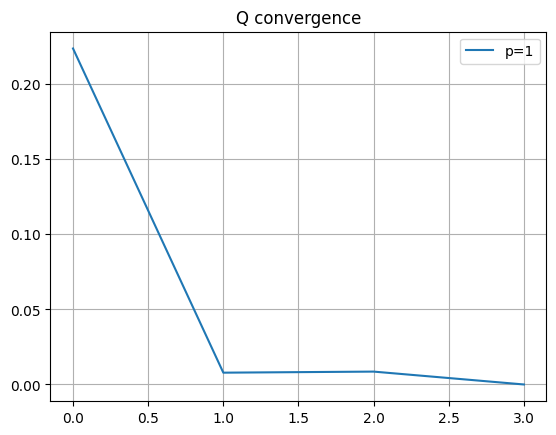

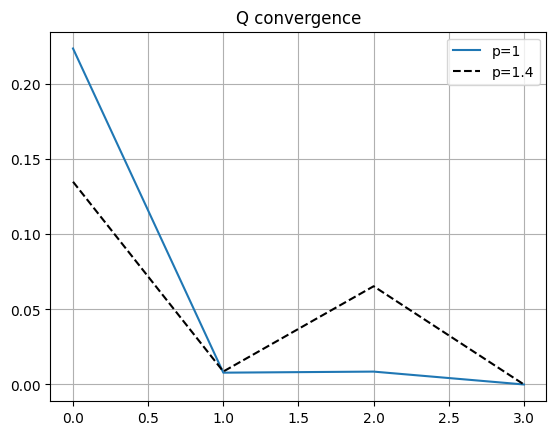

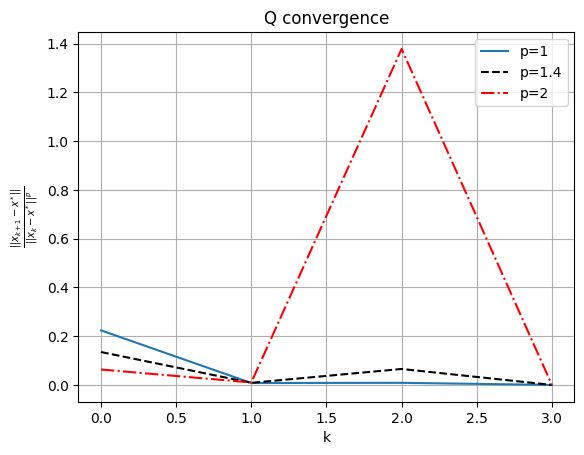

In [281]:
Functions.convergence_history(new_info, new_xMin, x0=[3,-2], p=2, H=None, plot_type='Q-convergence')

Text(0, 0.5, '$||\\nabla f(\\mathbf{x}_k)||$')

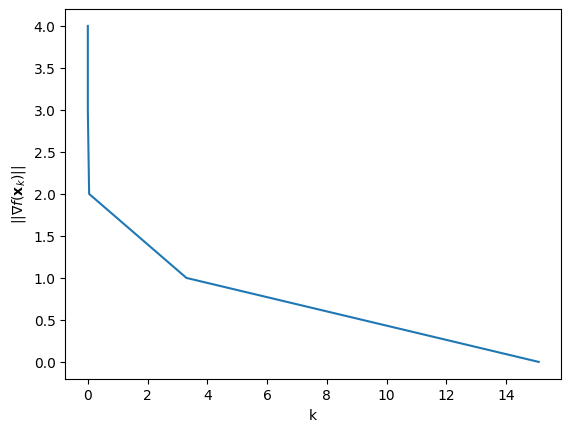

In [290]:
norm_grads = []
for i in new_info['xs']:
    norm_grads.append(norm(grad_f(i)))

plt.plot(norm_grads, np.arange(0, len(norm_grads)))
plt.xlabel('k')
plt.ylabel(r'$||\nabla f(\mathbf{x}_k)||$')

Line search stopped because the interval became too small. Returning center of the interval.
Centre: 0.0
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 0.0
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 0.0
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 0.0
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 0.0
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 0.0
Number of iterations: 8
Xmin: [0.5671432  0.56714329]
fMin(z): 3.242169918707819e-14)


/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_72101/4198343015.py:5: RuntimeWarning: divide by zero encountered in log
  return (y + np.log(x))**2 + (y-x)**2 #X>0!!!
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_72101/4198343015.py:10: RuntimeWarning: divide by zero encountered in log
  return np.array([2*(y+np.log(x))*1/x - 2*(y-x), 2*(y+np.log(x)) + 2*(y-x)])


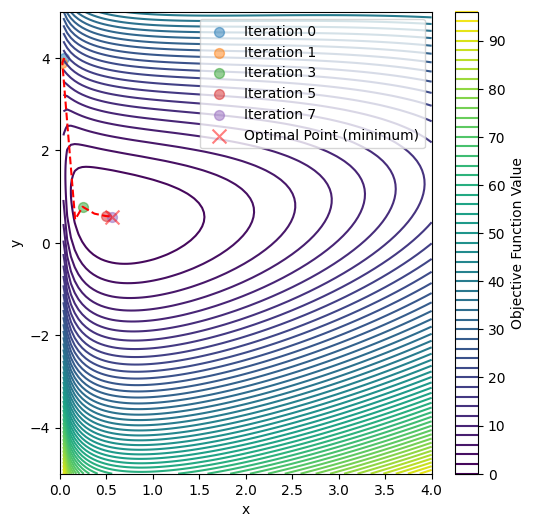

In [45]:
new_xMin_2, new_fMin_2, new_nIter_2, new_info_2 = Functions.descentLineSearch(x0 = [0.05,4], alpha0 = 0, alpha_max = 1, tol = 1e-6, maxIter = 500, ls ='linesearch', 
                                                      switch ='newton', stop_type = 'grad', fixed_step = False, fixed_alpha = 0.1)

print(f'Number of iterations: {new_nIter_2}\nXmin: {new_xMin_2}\nfMin(z): {new_fMin_2})')

cos = []
for co in new_info_2['xs']:
    cos.append([co[0], co[1]])
cos = np.array(cos)

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(0, 4, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Evaluate fxy at each point on the grid
Z = obj_function([X, Y])

plt.figure(figsize=(6,6))
contour = plt.contour(X, Y, Z, levels=50, cmap='viridis') 
plt.colorbar(contour, label='Objective Function Value')
for i in range(len(cos)):
    if i == 0 or i == int(1*len(cos)/5) or i == int(2*len(cos)/5) or i == int(3*len(cos)/5) or i == int(4*len(cos)/5) or i == len(cos):
        plt.scatter(cos[i,0], cos[i,1], s=50, label=f'Iteration {i}', alpha=0.5)
plt.plot(cos[:,0],cos[:,1], color='red', linestyle='dashed')
plt.scatter(0.567,0.567, color='red', marker='x', label='Optimal Point (minimum)', alpha=0.5, s=100)
# plt.title('Plotting the Descent for [0.05, 4] against contour plot') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

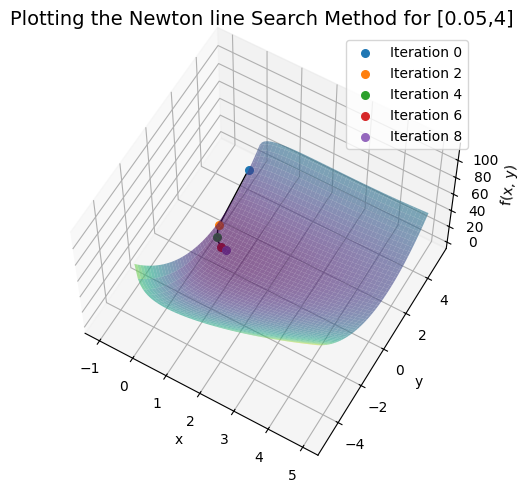

In [295]:
# Create a 3D plot
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
for i in range(len(cos)):
    if i == 0 or i == int(1*len(cos)/5) or i == int(2*len(cos)/5) or i == int(3*len(cos)/5) or i == int(4*len(cos)/5) or i == len(cos):
        ax.scatter(cos[i,0], cos[i,1], obj_function([cos[i,0], cos[i,1]]), s=30, label=f'Iteration {i}')
ax.plot(cos[:,0],cos[:,1], obj_function([cos[:,0], cos[:,1]]), color='black', linewidth=1)
ax.set_title('Plotting the Newton line Search Method for [0.05,4]', fontsize=14)
ax.set_xlabel('x')
ax.set_ylabel('y') 
ax.set_zlabel('f(x, y)')
ax.view_init(elev=60, azim=300)
ax.legend()
plt.tight_layout()

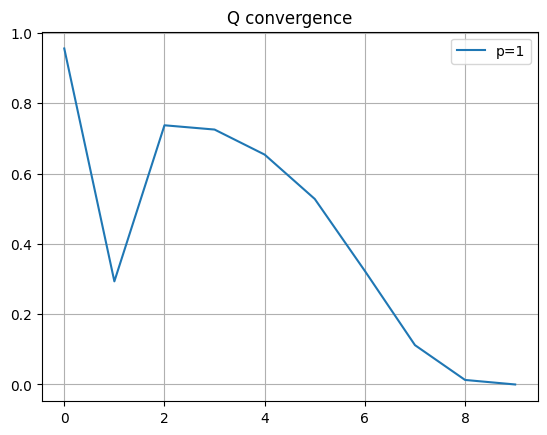

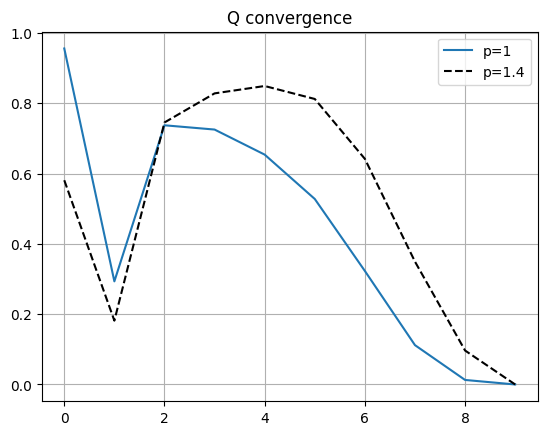

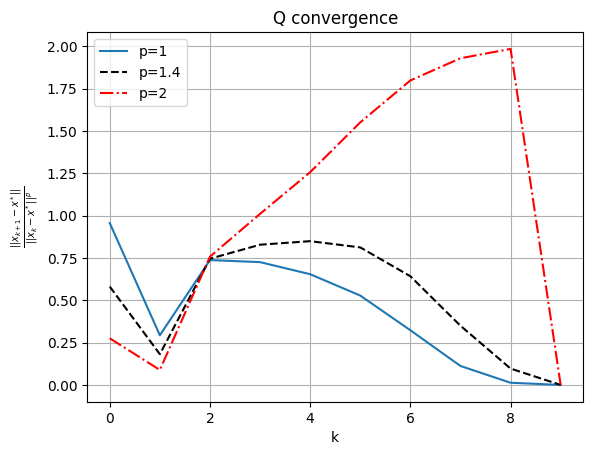

In [296]:
Functions.convergence_history(new_info_2, new_xMin_2, x0=[0.05,4], p=2, H=None, plot_type='Q-convergence')

In [201]:
# hessian must be positive definite for newton be well behaved
one = hess_f([0.05,4])
two = hess_f([3,-2])

one_e = np.linalg.eig(one)[0]
two_e = np.linalg.eig(two)[0]

print(one_e, two_e)

[-36.80339407  39.38921291] [1.66211063 4.76041997]
